In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord as coord
import astropy.units as u

https://www.herta-experiment.org/frbstats/

In [2]:
df_frb = pd.read_csv('/home/astroguy/frb_summerresearch/herta_frb_catalogue.csv', delimiter = ',', 
                     usecols=['frb', 'utc', 'mjd', 'telescope', 'ra', 'dec', 'l', 'b', 'frequency',
       'dm', 'flux', 'width', 'fluence',  'redshift'],)

### Below is how a data looks like in catalouge linked above.

In [3]:
df_frb.tail(60)

,frb,utc,mjd,telescope,ra,dec,l,b,frequency,dm,flux,width,fluence,redshift
746,FRB 20200323B,2020-03-23 10:53:35,58931.45388,GMRT,1:58:01,+65:43:00.31,129.71,3.73,400,349.000,-,10.49,15.11,0.0318
747,FRB 20200324A,2020-03-24 21:35:54,58932.89993,CHIME,1:39:05,+65:42:36,127.81,3.29,600,346.140,-,-,-,-
748,FRB 20200324B,2020-03-24 8:28:41,58932.35325,GMRT,1:58:01,+65:43:00.31,129.71,3.73,400,349.000,-,10.49,1.53,0.0318
749,FRB 20200324C,2020-03-24 9:31:24,58932.39681,GMRT,1:58:01,+65:43:00.31,129.71,3.73,400,349.000,-,10.49,3.51,0.0318
750,FRB 20200405A,2020-04-05 5:34:54,58944.23257,VLA,13:13:28,+36:35:37,98.06,79.45,361.941,212.298,-,6.25,100,0.2223
751,FRB 20200413A,2020-04-13 9:13:13,58952.38418,MeerTRAP,21:54:16.8,-28:12:36,20.73,-50.98,1284,1990.050,-,4.9,-,1.8995
752,FRB 20200423A,2020-04-23 20:11:20,58962.84120,VLA,1:58:01,+65:43:00.63,129.71,3.73,1680,349.800,0.13,10,1.3,0.0327
753,FRB 20200430A,2020-04-30 15:49:49,58969.65959,ASKAP,15:18:41,+12:20:23,17.06,52.52,864.5,380.100,-,-,35,0.3797
754,FRB 20200508A,2020-05-08 7:42:10,58977.32095,UTMOST,9:01:32,-65:35:43,282.02,-12.56,835,629.000,-,-,29.7,0.4048
755,FRB 20200514B,2020-05-14 5:40:46,58983.23664,UTMOST,07:01:00.55,-45:54:24.96,256.11,-17.56,835.2,349.400,-,-,11,0.147


In [5]:
list(df_frb['frb']).index('FRB 20210518A')

801

In [6]:
df_frb.iloc[1, 11]

'9'

### Segregating repeating FRBs from the catalouge

In [7]:
# This list contains all the FRB that are segregated as repeaters in above catalgue.

repeater_list = ['FRB 20121102A', 'FRB 20180814A', 'FRB 20180908A', 'FRB 20180916B', 'FRB 20181017A' ,'FRB 20181030A' ,'FRB 20181119A' ,'FRB 20181119C' , 'FRB 20181128A', 'FRB 20181225B' , 'FRB 20190107B', 'FRB 20190116A' , 'FRB 20190117A', 'FRB 20190208A', 'FRB 20190209A', 'FRB 20190212A', 'FRB 20190213A' , 'FRB 20190222A', 'FRB 20190303A', 'FRB 20190417A', 'FRB 20190604A', 'FRB 20190711A', 'FRB 20190907A', 'FRB 20200120E', 'FRB 20201124A']
repeater_index = []
# print(len(repeater_list))
# This block of code acts as a unit testing to see if repeaters listed in above list lied in the catalogue or not.

for k1 in np.arange(0, len(df_frb['frb'])):
    for k2 in np.arange(0, len(repeater_list)):
        if repeater_list[k2] == df_frb['frb'][k1]:
            repeater_index.append(k1)
print('Below is the list of index of repeating FRBs in the catalogue \n')
print(repeater_index)

Below is the list of index of repeating FRBs in the catalogue 

[14, 103, 114, 123, 154, 171, 192, 194, 209, 264, 301, 314, 320, 363, 366, 374, 378, 399, 424, 505, 579, 659, 673, 718, 765]


### Table below are 25 repeating FRBs  detected so far to date.

In [8]:
df_frb_repeater = df_frb.loc[repeater_index]

df_frb_repeater

,frb,utc,mjd,telescope,ra,dec,l,b,frequency,dm,flux,width,fluence,redshift
14,FRB 20121102A,2012-11-02 6:35:53,56233.27492,Arecibo,5:32:09,+33:05:13,174.95,-0.23,1375,557.00,0.4,3,1.2,0.2985
103,FRB 20180814A,2018-08-14 14:49:50,58344.61794,CHIME,4:22:00,+73:36:00,136.46,16.58,464.2,190.90,0.4,7.86,3,0.1042
114,FRB 20180908A,2018-09-08 21:13:04,58369.88407,CHIME,12:13:14.4,+74:12:36,126.45,42.66,600,195.72,-,-,-,0.1937
123,FRB 20180916B,2018-09-16 10:15:20,58377.42731,CHIME,1:58:00.7502,+65:43:00.3151,129.71,3.73,603.9,347.80,1.8,3.93,6,0.0306
154,FRB 20181017A,2018-10-17 23:26:12,58408.97653,CHIME,17:05:12,+68:18:00,99.15,34.80,535.9,1268.10,0.7,37.36,16,1.1824
171,FRB 20181030A,2018-10-30 4:13:13,58421.17585,CHIME,10:33:36,+73:48:00,134.84,39.98,703.7,101.90,4,1.97,8,0.0879
192,FRB 20181119A,2018-11-19 16:49:03,58441.70073,CHIME,12:42:00,+65:06:00,124.52,51.97,498,368.80,0.3,20.64,4,0.3697
194,FRB 20181119C,2018-11-19 17:06:29,58441.71284,CHIME,12:40:24,+82:12:00,123.39,34.96,400.2,283.10,3,0.98,3,0.2747
209,FRB 20181128A,2018-11-28 8:27:42,58450.35257,CHIME,4:55:36,+63:13:12,146.73,12.30,618.9,446.40,0.6,21.63,8,0.322
264,FRB 20181225B,2018-12-25 5:09:49,58477.21515,CHIME,2:27:12,+88:12:00,123.74,25.48,560.7,299.20,2,2.95,7,0.272


#### In  the table below, I have removed 5 FRBs from above table that does not have values for 'fluence' and 'width'.

In [9]:
df_frb_repeater_with_non_empty_val = df_frb_repeater.drop([114, 659, 673, 718, 765])
df_frb_repeater_with_non_empty_val

,frb,utc,mjd,telescope,ra,dec,l,b,frequency,dm,flux,width,fluence,redshift
14,FRB 20121102A,2012-11-02 6:35:53,56233.27492,Arecibo,5:32:09,+33:05:13,174.95,-0.23,1375,557.0,0.4,3,1.2,0.2985
103,FRB 20180814A,2018-08-14 14:49:50,58344.61794,CHIME,4:22:00,+73:36:00,136.46,16.58,464.2,190.9,0.4,7.86,3,0.1042
123,FRB 20180916B,2018-09-16 10:15:20,58377.42731,CHIME,1:58:00.7502,+65:43:00.3151,129.71,3.73,603.9,347.8,1.8,3.93,6,0.0306
154,FRB 20181017A,2018-10-17 23:26:12,58408.97653,CHIME,17:05:12,+68:18:00,99.15,34.80,535.9,1268.1,0.7,37.36,16,1.1824
171,FRB 20181030A,2018-10-30 4:13:13,58421.17585,CHIME,10:33:36,+73:48:00,134.84,39.98,703.7,101.9,4,1.97,8,0.0879
192,FRB 20181119A,2018-11-19 16:49:03,58441.70073,CHIME,12:42:00,+65:06:00,124.52,51.97,498,368.8,0.3,20.64,4,0.3697
194,FRB 20181119C,2018-11-19 17:06:29,58441.71284,CHIME,12:40:24,+82:12:00,123.39,34.96,400.2,283.1,3,0.98,3,0.2747
209,FRB 20181128A,2018-11-28 8:27:42,58450.35257,CHIME,4:55:36,+63:13:12,146.73,12.30,618.9,446.4,0.6,21.63,8,0.322
264,FRB 20181225B,2018-12-25 5:09:49,58477.21515,CHIME,2:27:12,+88:12:00,123.74,25.48,560.7,299.2,2,2.95,7,0.272
301,FRB 20190107B,2019-01-07 3:22:14,58490.14044,CHIME,2:14:00,+83:24:00,125.41,20.93,400.2,166.6,3,0.98,4,0.1128


#### Segregating non-repeating FRBs from main catalogue. I have also excluded those FRBs with no value available for 'width' and 'flux'.

In [10]:
non_repeater_index = []

for ind1 in np.arange(0, len(df_frb)):
    if df_frb.loc[ind1, 'width'] == '-' or df_frb.loc[ind1, 'flux'] == '-':  # Ignoring those FRBs with no data 
                                                                             # for "flux" and "burst width".  
        continue
    
    if ind1 not in repeater_index:
        non_repeater_index.append(ind1)
# print(non_repeater_index)
print('\n There are ', len(non_repeater_index), 'non-repeating FRBs with value available for burst width and flux.')


 There are  604 non-repeating FRBs with value available for burst width and flux.


In [11]:
df_non_repeating_frb = df_frb.loc[non_repeater_index]
df_non_repeating_frb.head()

,frb,utc,mjd,telescope,ra,dec,l,b,frequency,dm,flux,width,fluence,redshift
1,FRB 20010305A,2001-03-05 12:29:16,51973.52032,Parkes,4:57:20,-52:36:25,260.07,-38.35,1374,350.0,0.42,9,3.78,0.341
6,FRB 20110214A,2011-02-14 7:14:10,55606.30150,Parkes,1:21:17,-49:47:11,290.73,-66.63,1352,168.9,27,1.9,51.3,0.1758
8,FRB 20110523A,2011-05-23 15:06:20,55704.62940,GBT,21:45:12,-0:09:37,56.29,-37.73,800,623.3,0.6,1.73,-,0.5976
13,FRB 20121029A,2012-10-29 16:06:26,56229.67113,Pushchino LPA,0:12:00,+42:03:36,115.15,-20.21,111,732.0,0.34,320,1380,0.6663
18,FRB 20131030A,2013-10-30 16:13:15,56595.67587,Pushchino LPA,0:25:00,+39:58:48,117.45,-22.61,111,203.0,0.24,530,800,0.1739


In [12]:
df_non_repeating_frb.iloc[2, 3]

'GBT'

In [13]:
tel_counter = 0
for count1 in np.arange(0, len(df_non_repeating_frb['telescope'])):
    if df_non_repeating_frb.iloc[count1, 3] == 'Pushchino LPA':
        tel_counter +=1
                        
print(tel_counter)

10


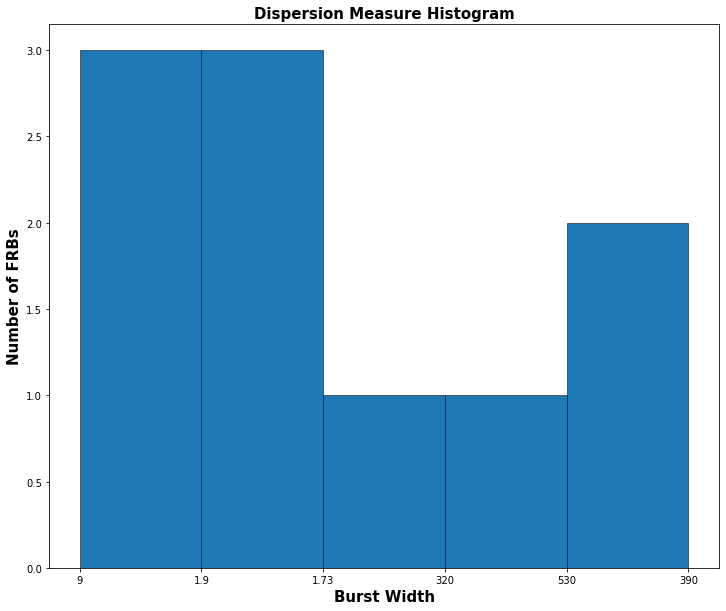

In [14]:
fig, ax_dm_hist = plt.subplots(figsize = (12, 10))
ax_dm_hist.hist(df_non_repeating_frb['width'], bins='auto', range = [0,5], linewidth=0.5, edgecolor="black")
ax_dm_hist.set_xlabel('Burst Width', size = 15, weight = 'bold')
ax_dm_hist.set_ylabel('Number of FRBs', size = 15, weight = 'bold')
ax_dm_hist.set_title('Dispersion Measure Histogram', size = 15, weight = 'bold')
plt.show()

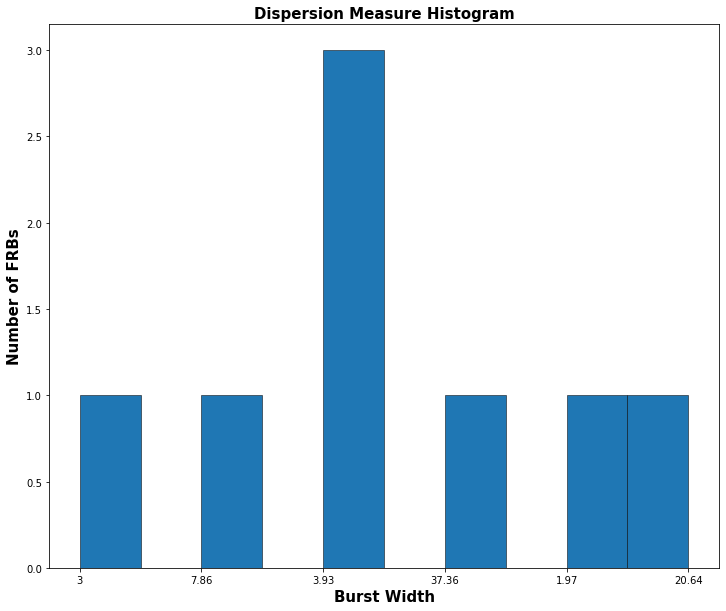

In [15]:
fig, ax_dm_hist = plt.subplots(figsize = (12, 10))
ax_dm_hist.hist(df_frb_repeater_with_non_empty_val['width'], bins=10, range = [0,5], linewidth=0.5, edgecolor="black")
ax_dm_hist.set_xlabel('Burst Width', size = 15, weight = 'bold')
ax_dm_hist.set_ylabel('Number of FRBs', size = 15, weight = 'bold')
ax_dm_hist.set_title('Dispersion Measure Histogram', size = 15, weight = 'bold')
plt.show()

In [16]:
df_frb_repeater_with_non_empty_val['width'].values

array(['3', '7.86', '3.93', '37.36', '1.97', '20.64', '0.98', '21.63',
       '2.95', '0.98', '12.78', '3.93', '33.42', '4.92', '5.9', '14.75',
       '8.85', '3.93', '17.69', '9.83'], dtype=object)

In [17]:
for j in np.arange(0, len(df_frb['frb'])):
    
    if df_frb.iloc[j, 0] == 'FRB 20180908A':
        print(j)
                

114


In [18]:
def intrinsic_width(disp_measure, freq_channel_bandwidth, central_freq, sampling_time, Obs_time):
    
    t_DM = 8.3*0.001*disp_measure*(freq_channel_bandwidth/(central_freq)^3)
    
    intrinsic_time = np.sqrt(obs_time**2 - t_DM**2 - sampling_time**2)

In [24]:
df_frb[1:5]

,frb,utc,mjd,telescope,ra,dec,l,b,frequency,dm,flux,width,fluence,redshift
1,FRB 20010305A,2001-03-05 12:29:16,51973.52032,Parkes,4:57:20,-52:36:25,260.07,-38.35,1374,350.0,0.42,9,3.78,0.341
2,FRB 20010312A,2001-03-12 11:06:48,51980.46306,Parkes,5:26:55,-64:56:19,274.72,-33.30,-,1187.0,0.25,-,-,1.0897
3,FRB 20010621A,2001-06-21 13:02:11,52081.54318,Parkes,18:52:05,-8:29:35,25.43,-4.00,-,745.0,0.41,-,-,0.4454
4,FRB 20010724A,2001-07-24 19:50:02,52114.82641,Parkes,1:18:06,-75:12:18,300.65,-41.81,-,375.0,30,-,-,0.369


In [20]:
column_names = ['source', 'Observed_width', 'intrinsic_width', 'flux', 'fluence', 'distance']

df_repeaters = pd.DataFrame(columns= column_names)

In [21]:
df_repeaters

,source,Observed_width,intrinsic_width,flux,fluence,distance


In [22]:
table_one = pd.DataFrame(columns = ['source', 'observed_width', 'intrinsic_width', 'flux_density', 'fluence'])

In [31]:
repeater_source_names = ['FRB 20190907A', 'FRB 20200307A', 'FRB 20190925A', 'FRB 20190915A']


observed_width = 0
flux_density = 0
fluence = 0
total_sample = 0

for a1 in np.arange(0 , len(repeater_source_names)):
    name = repeater_source_names[a1].replace('_', ' ')    # To match with the name in catalouge
    
    print('Loop No', a1)
    
    ind_no = list(df_frb['frb']).index(name)
    
    print('FRB Index',ind_no)
    
    if df_frb.iloc[ind_no, 11] == '-':                 # Column for width is 11th column
        continue
    total_sample += 1
    observed_width += float(df_frb.iloc[ind_no, 11])
    
    print('Sample count ', total_sample)
    print('Observed width', observed_width)
    print('\n\n')
    
#     flux_density += float(df_frb.iloc[ind_no, 10])
    
#     print('flux_density', flux_density)
    
#     fluence += float(df_frb.iloc[ind_no, 12])
    
#     print('fluence', fluence)
    

mean_obs_width = observed_width/total_sample

# mean_flux_density = flux_density/len(repeater_source_names)

# mean_fluence = fluence/len(repeater_source_names) 

# table_one.iloc[0, 0] = repeater_source_names[a1]

# table_one.iloc[0, 1] = mean_obs_width

# table_one.iloc[0, 3] = mean_flux_density

# table_one.iloc[0, 4] = mean_fluence

    
print('Average width ', mean_obs_width)

Loop No 0
FRB Index 673
Loop No 1
FRB Index 743
Loop No 2
FRB Index 675
Loop No 3
FRB Index 674


ZeroDivisionError: division by zero

In [35]:
df_frb.iloc[674, 11]

'-'

In [12]:
table_one.iloc[0]

,source,observed_width,intrinsic_width,flux_density,fluence
